In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import aubio
import matplotlib.pyplot as plt
import pandas as pd
import glob

from IPython import display
from pathlib import PurePath

import vxs
import vxs.utils as vxsu

In [2]:
BEATBOXSET1_DIR = '../data/beatboxset1'
AVP_DIR = '../data/AVP_Dataset'

plt.rcParams.update({'font.size': 16})    

In [3]:
beatboxset1_DR = vxs.Beatbox1TrackSet(BEATBOXSET1_DIR, annotation_type='DR')
beatboxset1_HT = vxs.Beatbox1TrackSet(BEATBOXSET1_DIR, annotation_type='HT')

In [4]:
track_sh, onsets_DR = beatboxset1_DR.get('snare_hex')
_, onsets_HT = beatboxset1_HT.get('snare_hex')

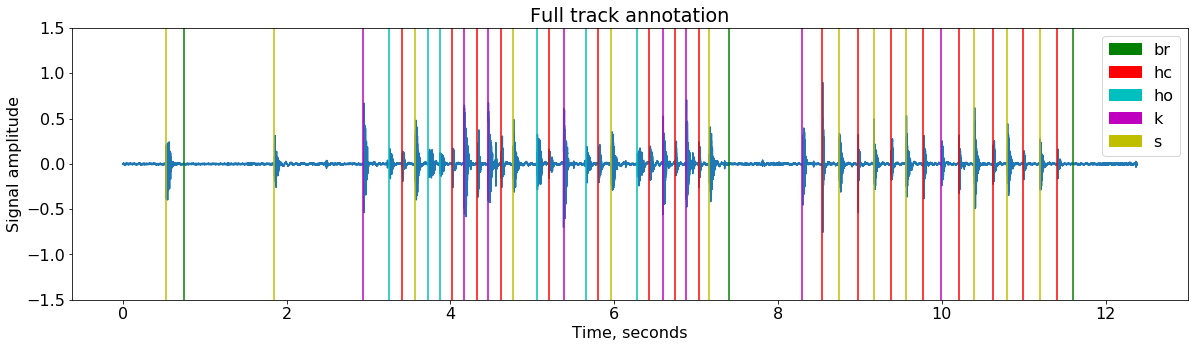

In [11]:
vxsu.plot_track(track_sh, onsets=onsets_DR, color_events=True, title='Full track annotation')

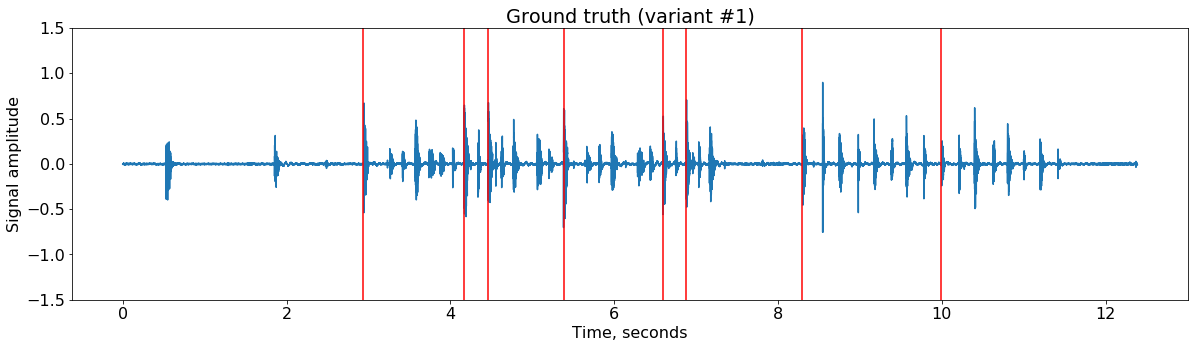

In [5]:
kick_events = vxsu.plot_track(track_sh, onsets=onsets_DR, event_type='k', title='Ground truth (variant #1)', return_events=True)

In [6]:
classes = onsets_DR['class'].unique()
classes

array(['s', 'br', 'k', 'ho', 'hc'], dtype=object)

In [7]:
onsets_HT['class'].unique()

array(['sb', 'k', 'hc', 's', 'sk', 'br'], dtype=object)

In [8]:
df = pd.DataFrame(columns=classes, index=classes, dtype=int).fillna(0)

In [9]:
vxsu.play_audio(track_sh)

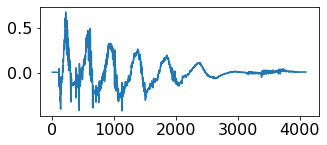

In [13]:
segm = vxsu.plot_segment(track_sh, kick_events[2])

In [14]:
vxsu.play_audio(segm)

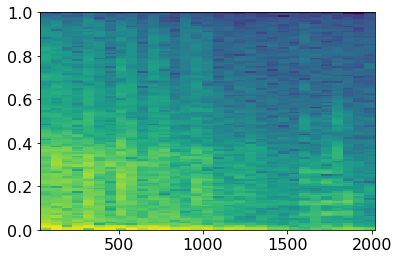

In [15]:
_ = plt.specgram(segm.wave, Fs=2)

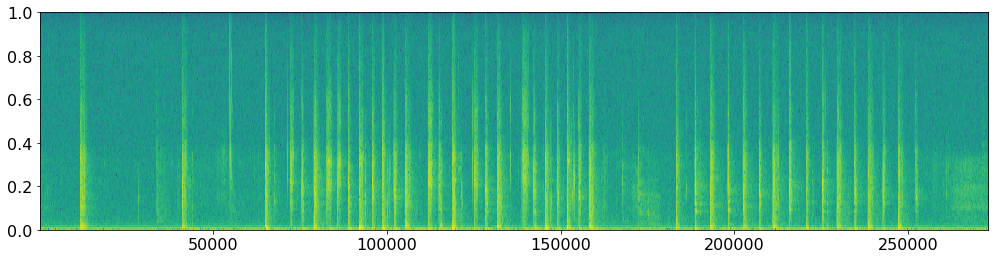

In [16]:
fig = plt.figure(figsize=(17,4))
_ = plt.specgram(track_sh.wave, Fs=2)

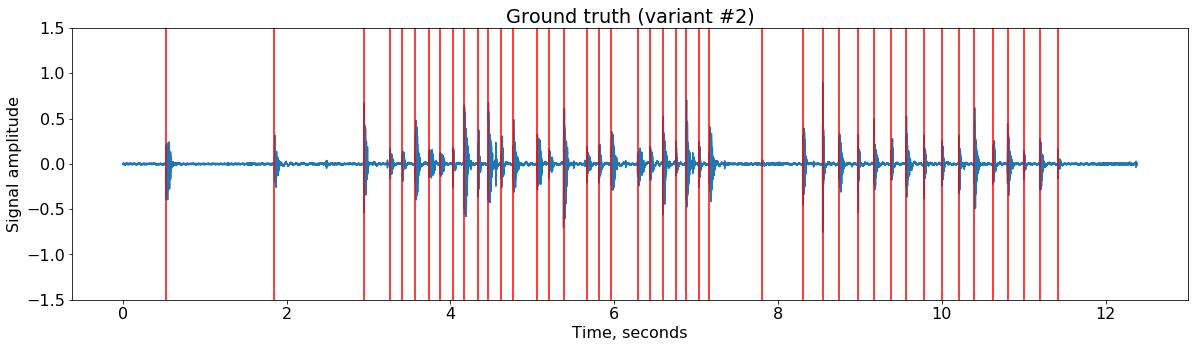

In [17]:
vxsu.plot_track(track_sh, onsets=onsets_HT, title='Ground truth (variant #2)')

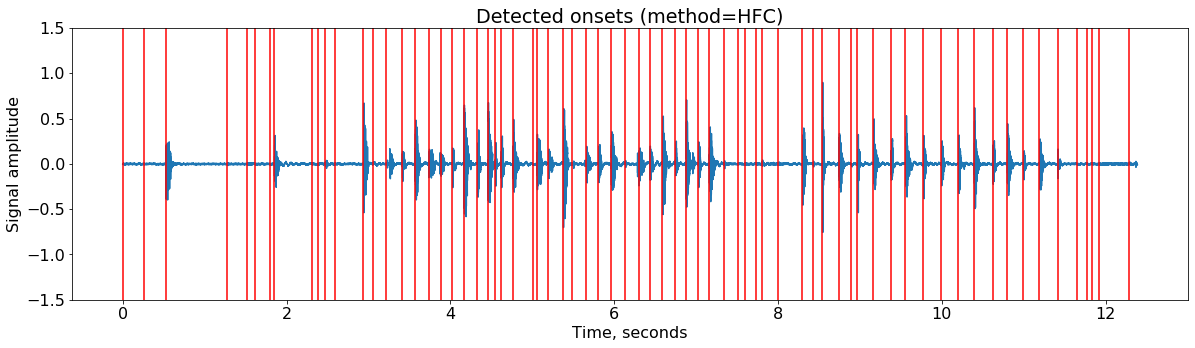

In [18]:
onsets_detected_hfc = vxs.detect_onsets(track_sh, method='hfc')
vxsu.plot_track(track_sh, onsets=onsets_detected_hfc, title='Detected onsets (method=HFC)')

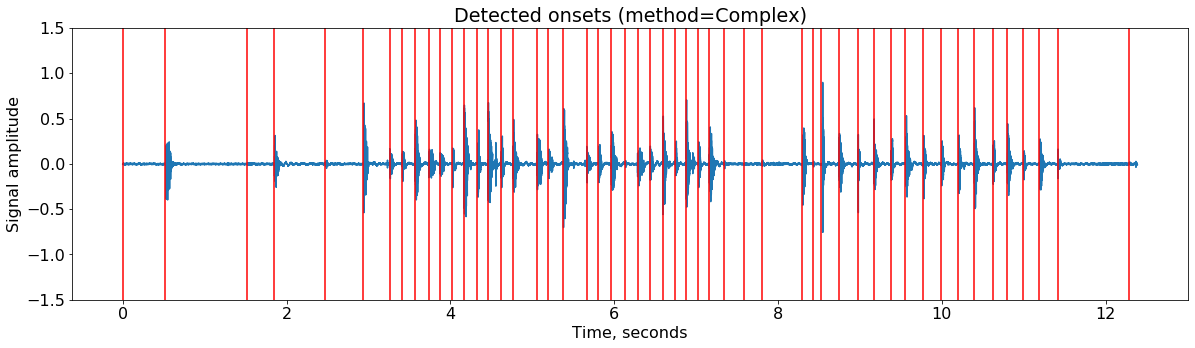

In [19]:
onsets_detected_cp = vxs.detect_onsets(track_sh, method='complex')
vxsu.plot_track(track_sh, onsets=onsets_detected_cp, title='Detected onsets (method=Complex)')

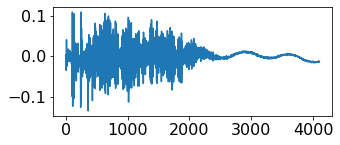

In [20]:
segm = vxsu.plot_segment(track_sh, onsets_detected_cp['time'][10])

In [21]:
vxsu.play_audio(segm)

In [22]:
vxs.onsets_F1_score(onsets_DR['time'].values, onsets_detected_hfc['time'], ms_threshold=10)

0.6837606837606838

In [23]:
scores_DR = vxs.dataset_onset_scores(beatboxset1_DR, methods=['hfc', 'complex', 'specflux'])
scores_HT = vxs.dataset_onset_scores(beatboxset1_HT, methods=['hfc', 'complex', 'specflux'])

In [24]:
bbs_scores = pd.merge(scores_DR, scores_HT, on='track', suffixes=('_DR', '_HT'))

In [25]:
bbs_scores

,track,hfc_F1_DR,hfc_prec_DR,hfc_rec_DR,complex_F1_DR,complex_prec_DR,complex_rec_DR,specflux_F1_DR,specflux_prec_DR,specflux_rec_DR,hfc_F1_HT,hfc_prec_HT,hfc_rec_HT,complex_F1_HT,complex_prec_HT,complex_rec_HT,specflux_F1_HT,specflux_prec_HT,specflux_rec_HT
0,putfile_bui,0.901564,0.829103,0.987903,0.921624,0.866785,0.983871,0.862989,0.772293,0.977823,0.892606,0.857868,0.930275,0.915162,0.900533,0.930275,0.855925,0.799363,0.921101
1,snare_hex,0.752137,0.619718,0.956522,0.877551,0.826923,0.934783,0.715447,0.571429,0.956522,0.765217,0.619718,1.000000,0.916667,0.846154,1.000000,0.710744,0.558442,0.977273
2,putfile_william,0.954424,0.927083,0.983425,0.988950,0.988950,0.988950,0.896725,0.824074,0.983425,0.957219,0.932292,0.983516,0.991736,0.994475,0.989011,0.899497,0.828704,0.983516
3,callout_Turn-Table,0.907801,0.836601,0.992248,0.933824,0.888112,0.984496,0.851351,0.754491,0.976744,0.914676,0.875817,0.957143,0.932862,0.923077,0.942857,0.853420,0.784431,0.935714
4,callout_Pneumatic,0.964187,0.940860,0.988701,0.983051,0.983051,0.983051,0.953678,0.921053,0.988701,0.955307,0.919355,0.994186,0.968481,0.954802,0.982558,0.939227,0.894737,0.988372
5,callout_adiao,0.971751,0.959108,0.984733,0.971319,0.973180,0.969466,0.950820,0.909408,0.996183,0.965909,0.947955,0.984556,0.965385,0.961686,0.969112,0.923077,0.878049,0.972973
6,callout_luckeymonkey,0.946136,0.935185,0.957346,0.942928,0.989583,0.900474,0.951501,0.927928,0.976303,0.953052,0.939815,0.966667,0.945274,0.989583,0.904762,0.958333,0.932432,0.985714
7,callout_mcld,0.859375,0.774648,0.964912,0.933333,0.925287,0.941520,0.852868,0.743478,1.000000,0.863874,0.774648,0.976331,0.938776,0.925287,0.952663,0.827068,0.717391,0.976331
8,putfile_dbztenkaichi,0.844444,0.772727,0.930836,0.885517,0.849206,0.925072,0.818408,0.719912,0.948127,0.819427,0.787081,0.854545,0.865007,0.873016,0.857143,0.805226,0.741794,0.880519
9,callout_azeem,0.932886,0.917492,0.948805,0.926746,0.925170,0.928328,0.918469,0.896104,0.941980,0.923333,0.914191,0.932660,0.927242,0.931973,0.922559,0.905785,0.889610,0.922559


In [26]:
bbs_scores.mean()

hfc_F1_DR           0.905683
hfc_prec_DR         0.852600
hfc_rec_DR          0.971866
complex_F1_DR       0.931821
complex_prec_DR     0.911644
complex_rec_DR      0.955934
specflux_F1_DR      0.880143
specflux_prec_DR    0.807198
specflux_rec_DR     0.975397
hfc_F1_HT           0.901820
hfc_prec_HT         0.863207
hfc_rec_HT          0.949990
complex_F1_HT       0.928143
complex_prec_HT     0.923081
complex_rec_HT      0.934546
specflux_F1_HT      0.868718
specflux_prec_HT    0.809891
specflux_rec_HT     0.944491
dtype: float64

In [27]:
bbs_scores.std()

hfc_F1_DR           0.059889
hfc_prec_DR         0.095920
hfc_rec_DR          0.018950
complex_F1_DR       0.035834
complex_prec_DR     0.065058
complex_rec_DR      0.029478
specflux_F1_DR      0.064810
specflux_prec_DR    0.100887
specflux_rec_DR     0.017890
hfc_F1_HT           0.058356
hfc_prec_HT         0.087846
hfc_rec_HT          0.044285
complex_F1_HT       0.037629
complex_prec_HT     0.046198
complex_rec_HT      0.044273
specflux_F1_HT      0.063930
specflux_prec_HT    0.095041
specflux_rec_HT     0.042342
dtype: float64

In [28]:
def prec_rec_bar_plot(scores, labels, precs, recs, title='precision/recall'):
    mean_scores = scores.mean()
    precisions = mean_scores[precs]
    recalls = mean_scores[recs]
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.bar(x - width/2, precisions, width, label='Precision')
    rects2 = ax.bar(x + width/2, recalls, width, label='Recall')

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

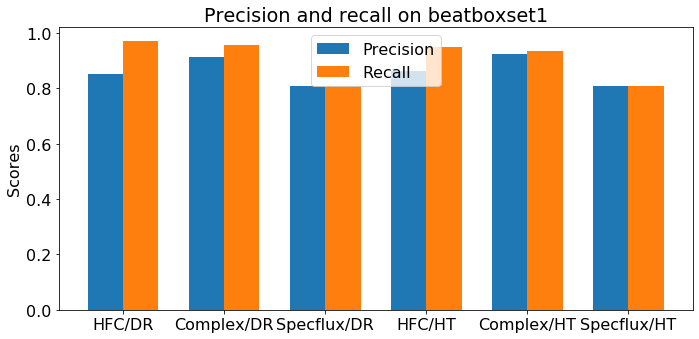

In [29]:
labels = ['HFC/DR', 'Complex/DR', 'Specflux/DR', 'HFC/HT', 'Complex/HT', 'Specflux/HT']
precs = ['hfc_prec_DR', 'complex_prec_DR', 'specflux_prec_DR', 'hfc_prec_HT', 'complex_prec_HT', 'specflux_prec_HT']
recs = ['hfc_rec_DR', 'complex_rec_DR', 'specflux_prec_DR', 'hfc_rec_HT', 'complex_rec_HT', 'specflux_prec_HT']

prec_rec_bar_plot(bbs_scores, labels, precs, recs, title='Precision and recall on beatboxset1')

In [30]:
avp_set = vxs.AVPTrackSet(AVP_DIR)
avp_scores = vxs.dataset_onset_scores(avp_set, methods=['hfc', 'complex', 'specflux'])

In [31]:
avp_scores

,track,hfc_F1,hfc_prec,hfc_rec,complex_F1,complex_prec,complex_rec,specflux_F1,specflux_prec,specflux_rec
0,P8_Improvisation_Personal,0.854545,0.746032,1.0,0.938776,0.901961,0.978723,0.846847,0.734375,1.0
1,P8_Kick_Personal,0.979592,0.960000,1.0,0.958333,0.958333,0.958333,0.960000,0.923077,1.0
2,P8_Snare_Personal,0.923077,0.857143,1.0,0.913043,0.954545,0.875000,0.923077,0.857143,1.0
3,P8_HHclosed_Personal,0.941176,0.888889,1.0,0.920000,0.884615,0.958333,0.941176,0.888889,1.0
4,P8_HHopened_Personal,0.960000,0.923077,1.0,0.897959,0.880000,0.916667,0.941176,0.888889,1.0
...,...,...,...,...,...,...,...,...,...,...
260,P23_Snare_Fixed,0.955224,0.914286,1.0,0.953846,0.939394,0.968750,0.876712,0.780488,1.0
261,P23_HHclosed_Fixed,0.969697,0.941176,1.0,1.000000,1.000000,1.000000,0.888889,0.800000,1.0
262,P23_Kick_Fixed,0.761905,0.615385,1.0,0.953846,0.939394,0.968750,0.810127,0.680851,1.0
263,P23_Improvisation_Fixed,0.948276,0.901639,1.0,0.973451,0.948276,1.000000,0.920502,0.852713,1.0


In [32]:
avp_scores[avp_scores['hfc_F1'] == 0]

,track,hfc_F1,hfc_prec,hfc_rec,complex_F1,complex_prec,complex_rec,specflux_F1,specflux_prec,specflux_rec
221,P4_HHclosed_Fixed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
track, annotation = avp_set.get('P8_HHopened_Personal')
onsets_pred = vxs.detect_onsets(track, method='complex')

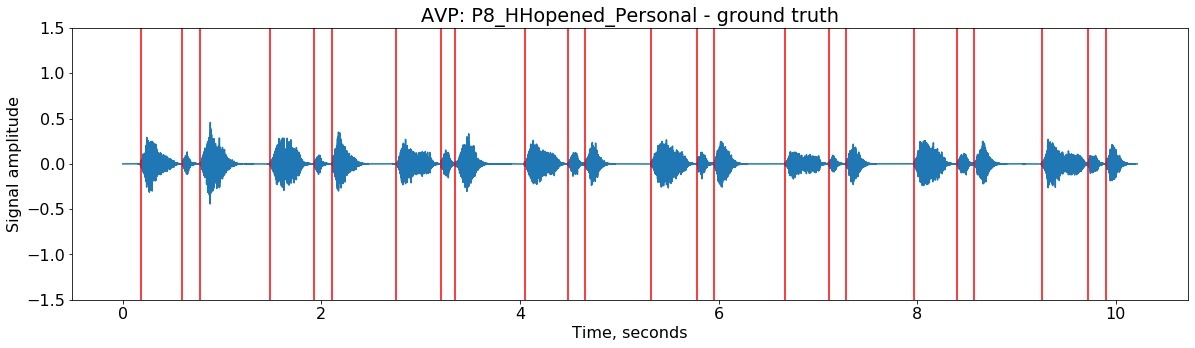

In [34]:
vxsu.plot_track(track, onsets=annotation, title='AVP: P8_HHopened_Personal - ground truth')

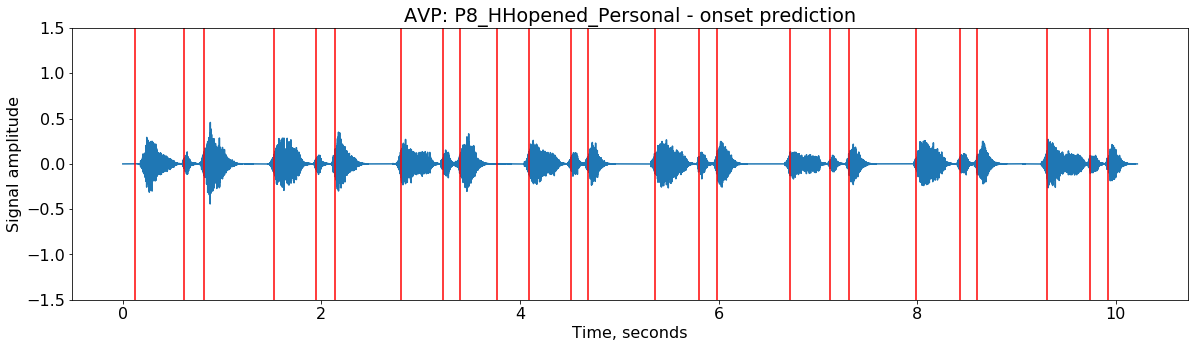

In [35]:
vxsu.plot_track(track, onsets=onsets_pred, title='AVP: P8_HHopened_Personal - onset prediction')

In [36]:
avp_scores.mean()

hfc_F1           0.883038
hfc_prec         0.810385
hfc_rec          0.983208
complex_F1       0.930681
complex_prec     0.911859
complex_rec      0.955990
specflux_F1      0.852366
specflux_prec    0.763089
specflux_rec     0.980446
dtype: float64

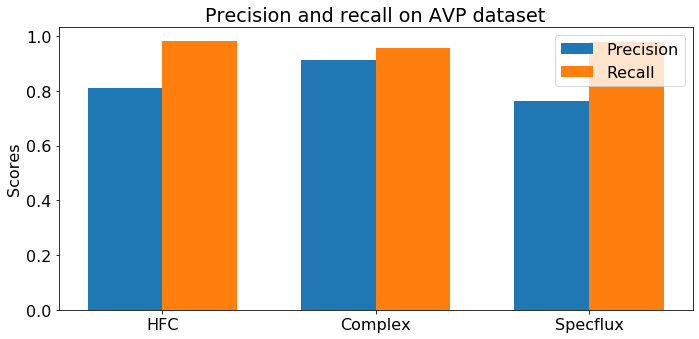

In [37]:
labels = ['HFC', 'Complex', 'Specflux']
precs = ['hfc_prec', 'complex_prec', 'specflux_prec']
recs = ['hfc_rec', 'complex_rec', 'specflux_rec']

prec_rec_bar_plot(avp_scores, labels, precs, recs, title='Precision and recall on AVP dataset')

In [38]:
avp_scores_tight = vxs.dataset_onset_scores(avp_set, ms_threshold=10, methods=['hfc', 'complex', 'specflux'])

In [39]:
avp_scores_tight

,track,hfc_F1,hfc_prec,hfc_rec,complex_F1,complex_prec,complex_rec,specflux_F1,specflux_prec,specflux_rec
0,P8_Improvisation_Personal,0.654545,0.571429,0.765957,0.653061,0.627451,0.680851,0.666667,0.578125,0.787234
1,P8_Kick_Personal,0.612245,0.600000,0.625000,0.541667,0.541667,0.541667,0.720000,0.692308,0.750000
2,P8_Snare_Personal,0.115385,0.107143,0.125000,0.260870,0.272727,0.250000,0.846154,0.785714,0.916667
3,P8_HHclosed_Personal,0.392157,0.370370,0.416667,0.240000,0.230769,0.250000,0.901961,0.851852,0.958333
4,P8_HHopened_Personal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.862745,0.814815,0.916667
...,...,...,...,...,...,...,...,...,...,...
260,P23_Snare_Fixed,0.955224,0.914286,1.000000,0.953846,0.939394,0.968750,0.767123,0.682927,0.875000
261,P23_HHclosed_Fixed,0.939394,0.911765,0.968750,0.937500,0.937500,0.937500,0.888889,0.800000,1.000000
262,P23_Kick_Fixed,0.476190,0.384615,0.625000,0.861538,0.848485,0.875000,0.126582,0.106383,0.156250
263,P23_Improvisation_Fixed,0.767241,0.729508,0.809091,0.769912,0.750000,0.790909,0.644351,0.596899,0.700000


In [40]:
avp_scores_tight.mean()

hfc_F1           0.502204
hfc_prec         0.457188
hfc_rec          0.564944
complex_F1       0.555029
complex_prec     0.542740
complex_rec      0.571460
specflux_F1      0.501963
specflux_prec    0.451309
specflux_rec     0.573591
dtype: float64

In [41]:
bbs_scores_tight = vxs.dataset_onset_scores(beatboxset1_HT, ms_threshold=10, methods=['hfc', 'complex', 'specflux'])

In [42]:
bbs_scores_tight.mean()

hfc_F1           0.645664
hfc_prec         0.618762
hfc_rec          0.679450
complex_F1       0.698170
complex_prec     0.694772
complex_rec      0.702720
specflux_F1      0.298724
specflux_prec    0.279937
specflux_rec     0.321427
dtype: float64